In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
from matplotlib import pyplot as plt

## Exercise 1. Regression: order-$k$ polynomials

1. Convince yourself, that the least squares solution is $\hat w = (\Phi^T \Phi)^{-1} \Phi^Ty$.
2. What condition does the data matrix have to fulfill in order for the solution to exist?
3. Find the solution for $k=0$
4. Adding l2-regularizer, convince yourself that $\hat w = (\Phi^T \Phi + \lambda I)^{-1} \Phi^Ty$.

### Solution 1

1. Convince yourself, that the least squares solution is $\hat w = (\Phi^T \Phi)^{-1} \Phi^Ty$.

We optimize the following convex objective:

$\hat w = \arg \min_{w} \frac{1}{2} \Vert y - \Phi w \Vert^2$

It's equivalent to minimize the following, where we dropped terms not depending on w:

$\frac{1}{2} w^T \Phi^T \Phi w - w^T \Phi^T y$

Taking $\nabla_w$ and setting to 0:

$\Phi^T\Phi w = \Phi^Ty$

2. What condition does the data matrix have to fulfill in order for the solution to exist?

The system matrix $\Phi^T \Phi$ must have full rank. So the number of samples should be at least $k+1$.

3. Find the solution for $k=0$

If $k=0$, $\Phi$ is the constant $1$ vector. $\Phi^T\Phi = N$ and $\Phi^T y = \sum_i y_i$. Hence, $\hat w = \frac{1}{N} \sum_i y_i$, the average of the labels.

4. Adding l2-regularizer, convince yourself that $\hat w = (\Phi^T \Phi + \lambda I)^{-1} \Phi^Ty$.

Similar to 1., we add the regularizer and expand

$\hat w = \arg \min_{w} \frac{1}{2} \Vert y - \Phi w \Vert^2 + \frac{1}{2} \lambda \Vert w \Vert^2$

to

$\frac{1}{2} w^T \Phi^T \Phi w - w^T \Phi^T y + \frac{1}{2} \lambda w^T w$

## Exercise 2. Generalization Error and Regularization

Consider the input space $\mathcal{X} = [-1,1]$ and $\mathcal{Y} = \mathbb{R}$, and the following ground-truth function:

$y = f(x) = 0.1 x^3 - 0.025 x^2 + 0.01 x + 0.2$

1. Draw a random training set of size 25, using the following rule:

$y = f(x) + \epsilon, x \sim \text{Uniform}([-1,1]), \epsilon \sim \mathcal{N}(0, 10^{-4})$

2. Draw a test set of size 100 using the ground-truth function above.
3. Fit an order $k$ polynomial and plot train and test error vs $k$ for $k = {0, \ldots, 15}$. Use the mean squared error $l(y, \hat y) = \frac{1}{N} \sum_i (y_i - \hat y_i)^2$ to compute train and test errors
4. For different $k=0,3,15$, draw training sets of growing size: $N=25,250,2500$. Plot test error vs the number of training points.
5. Repeat 4, but fix $k=15$, and plot train and test error vs $\lambda={0, 0.1, 1000}$, the regularization strenght of the l2 penalty

### Solution 2

In [3]:
from mlcourse import *
import numpy as np
from matplotlib import pyplot as plt

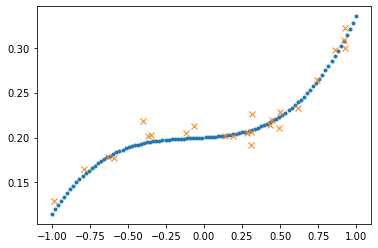

In [4]:
np.random.seed(12345)
N = 100
x_test = np.linspace(-1,1,N)
y_test = f_true(x_test)
plt.plot(x_test,y_test,'.')

x_train = np.sort(np.random.rand(25) * 2 - 1)
y_train = f_true(x_train) + np.random.randn(25) * 0.01
plt.plot(x_train, y_train, 'x')

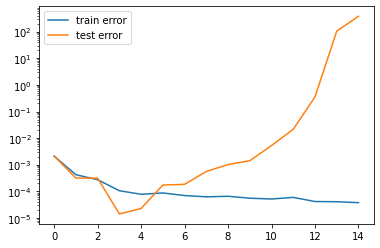

In [5]:
np.random.seed(12345)
ks = np.arange(15)
trials = 10 
train_errs = []
test_errs = []
for k in ks:
    train_err_trials = np.zeros(trials)
    test_err_trials = np.zeros(trials)
    for it in range(trials):
        
        x_train = np.random.rand(25) * 2 - 1
        y_train = f_true(x_train) + np.random.randn(25) * 0.01
        what = fit(x_train, y_train, k)
        yhat_train = predict(x_train, what)
        yhat_test = predict(x_test, what)
        train_err = mse(y_train, yhat_train)
        test_err = mse(y_test, yhat_test)
        train_err_trials[it] = train_err
        test_err_trials[it] = test_err
    train_errs.append(np.mean(train_err_trials))
    test_errs.append(np.mean(test_err_trials))
plt.semilogy(ks, train_errs, label='train error')
plt.semilogy(ks, test_errs, label='test error')
plt.legend()

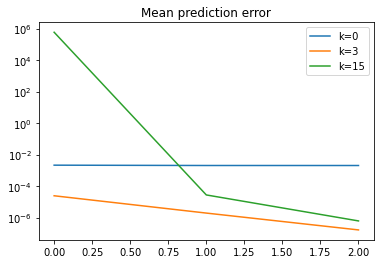

In [6]:
np.random.seed(12345)
ks = (0, 3, 15)
Ns = (25, 250,2500)
trials = 10
errors = np.zeros((len(Ns), len(ks), trials))

for it, k in enumerate(ks):
    for jt, N in enumerate(Ns):
        for kt in range(trials):
            x_train = np.random.rand(N) * 2 - 1
            y_train = f_true(x_train) + np.random.randn(N) * 0.01
            what = fit(x_train, y_train, k)
            yhat_test = predict(x_test, what)
            test_err = (mse(y_test, yhat_test))
            errors[jt, it, kt] = test_err
            
plt.figure()
for it, k in enumerate(ks):
    mu = np.mean(errors, 2)
    plt.semilogy(mu[:, it], label='k={}'.format(k))
plt.legend()
plt.title("Mean prediction error");
 

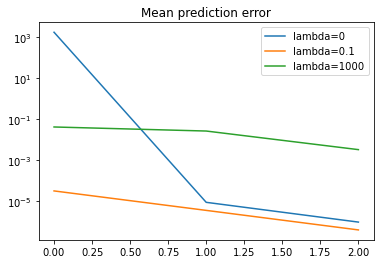

In [7]:
lambdas = [0, 0.1, 1000]
k = 15
Ns = (25, 250,2500)
trials = 10
errors = np.zeros((len(Ns), len(lambdas), trials))

for it, lam in enumerate(lambdas):
    for jt, N in enumerate(Ns):
        for kt in range(trials):
            x_train = np.random.rand(N) * 2 - 1
            y_train = f_true(x_train) + np.random.randn(N) * 0.01
            what = fit(x_train, y_train, k, lam)
            yhat_test = predict(x_test, what)
            test_err = (mse(y_test, yhat_test))
            errors[jt, it, kt] = test_err
            
plt.figure()
for it, l in enumerate(lambdas):
    mu = np.mean(errors, 2)
    plt.semilogy(mu[:, it], label='lambda={}'.format(l))
plt.legend()
plt.title("Mean prediction error");

## Exercise 3. GLMs, Logistic Regression

1. Convince yourself, that, if we encode the binary outcome as $Y \in {\pm 1}$, the (conditional) log-likelihood under the logistic regression model simplifies to:

$L(w) := \log P(Y \mid X, w) = \sum_i \log \sigma(y_i \Phi(x_i)^T w)$

2. Convince yourself, that $\sigma'(x) = \sigma(x) (1 - \sigma(x))$ for the logistic function. What is $\nabla_w L(w)$?
3. Fit a binary logistic regression model to the problem of distinguishing 4s vs 7s in the MNIST dataset.
4. Plot some samples in the training set, where the model is very confident and some samples where the model is not very confident.

### Solution 3

1. Convince yourself, that, if we encode the binary outcome as $Y \in {\pm 1}$, the (conditional) log-likelihood under the logistic regression model simplifies to:

Let $z:= f_{\theta}(x)$ and consider the individual likelihood terms:

$p_i^{y_i} (1-p_i)^{1-y_i}$ where $p_i = \sigma(z_i)$.
The term equals $\sigma(z) = \frac{1}{1+e^{-z}}$ if $y=1$ 
and $1-\sigma(z) = \frac{1}{1+e^{z}}$ if $y=0$. 
Hence, if we encode $y=0$ as $y=-1$, the likelihood term can be expressed as $\sigma(y z)$.

2. Convince yourself, that $\sigma'(x) = \sigma(x) (1 - \sigma(x))$ for the logistic function. What is $\nabla_w L(w)$?

$ \sigma(x)' = -(1 + e^{-x})^{-2} (-e^{-x}) = \sigma(x) \frac{1 + e^{-x} - 1}{1+e^{-x}} = \sigma(x) (1-\sigma(x))$

$\nabla_w L(w) = \sum_i \frac{1}{\sigma(y_i z_i)} \sigma(y_i z_i) (1-\sigma(y_i z_i)) y_i \Phi(x_i) = \sum_i  (1-\sigma(y_i z_i)) y_i \Phi(x_i)$

Intuitively, the gradient tries to make the weights more similar to the $i$-th sample, if the confidence at that samples is low.


In [8]:
import numpy as np
import cuml
from cuml.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegression as sklLogisticRegression

import matplotlib.pyplot as plt
from timeit import default_timer
from sklearn.model_selection import train_test_split
from cudf import Series
from scipy import stats
import cupy

import sklearn
from sklearn.datasets import fetch_openml

X, y = fetch_openml('mnist_784', version=1, return_X_y=True) 
X /= 255.0 # scale to 0-1 range
y = sklearn.preprocessing.LabelEncoder().fit_transform(y)

In [9]:
class_0 = 4
class_1 = 7
idx_ = np.logical_or((y == class_0), (y == class_1))

X_ = X[idx_, :]
y_ = y[idx_].astype(np.float64)
y_[y_ == class_0] = 0.0
y_[y_ == class_1] = 1.0
X_train, X_test, y_train, y_test = train_test_split(X_, y_, random_state=77)

In [10]:
params = {'penalty':'l2', 'C':1, 'tol':1e-4, 'fit_intercept': True, 'max_iter':2000, 'verbose':False}

cls = LogisticRegression(**params)

cls.fit(X_train, y_train)
print('cuML score train: {0:7.4f}, test: {1:7.4f}'.format(cls.score(X_train, y_train), cls.score(X_test, y_test)))

cuML score train:  0.9729, test:  0.9686


In [11]:
w = cls.coef_.to_output('numpy')

In [12]:
b = cls.intercept_.to_output('numpy')

In [13]:
z = X_ @ w + b

In [14]:
sidx = np.argsort(np.abs(z), axis=0)

[3626] [[0.49968046]]
[8822] [[0.49967716]]
[4674] [[0.49962011]]
[3872] [[0.50047815]]
[9045] [[0.4995138]]
[9662] [[0.50049264]]
[3340] [[0.499251]]
[4765] [[0.50075361]]
[9452] [[0.4992009]]
[12379] [[0.50081789]]


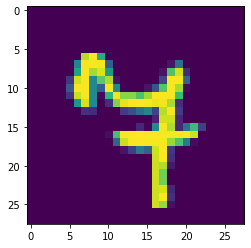

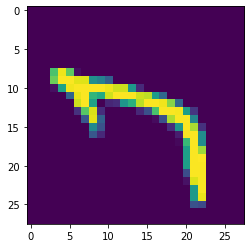

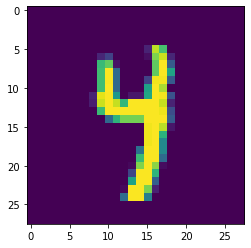

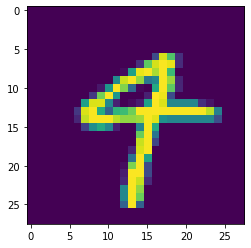

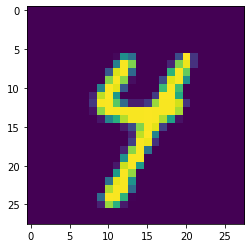

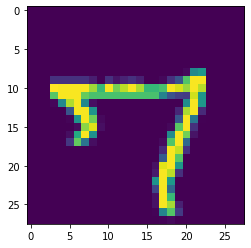

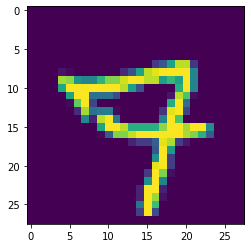

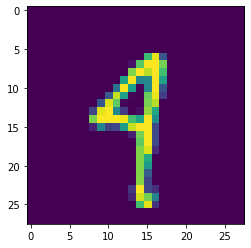

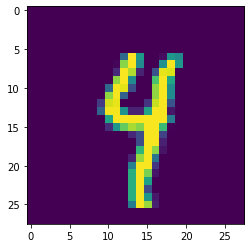

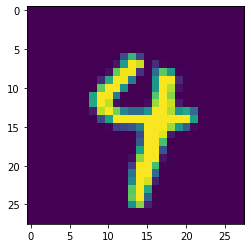

In [15]:
for idx in sidx[:10]:
    print(idx, 1/(1+np.exp(-z[idx])))
    plt.figure()
    plt.imshow(X_[idx,:].reshape(28,28))

[1294] [[0.89976054]]
[8544] [[0.89999718]]
[434] [[0.09924105]]
[13180] [[0.90205749]]
[12261] [[0.09690345]]
[1303] [[0.90370937]]
[12854] [[0.09346497]]
[9284] [[0.90871758]]
[2516] [[0.0864762]]
[1758] [[0.08531589]]


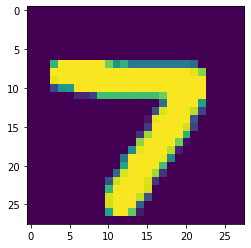

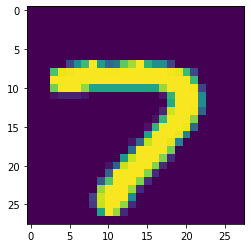

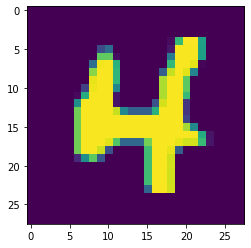

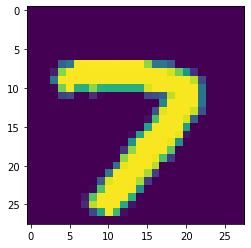

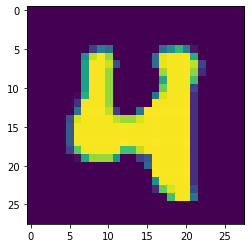

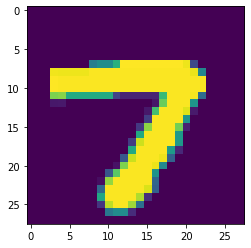

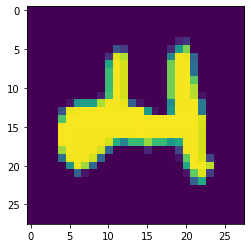

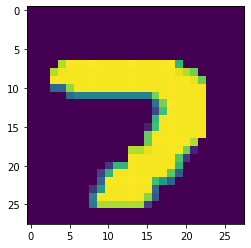

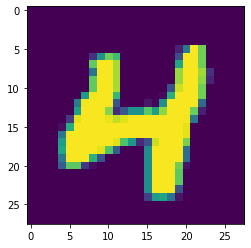

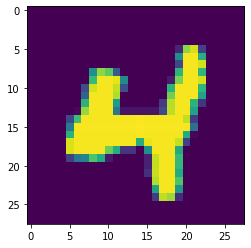

In [16]:
for idx in sidx[-10 :]:
    print(idx, 1/(1+np.exp(-z[idx])))
    plt.figure()
    plt.imshow(X_[idx,:].reshape(28,28))

## Exercise 4. XGBoost 
 
1. Sketch the piece-wise constant function represented by the following trees on the domain $[-1,1]$
```
# Tree 1
     (0.15)
```
```
# Tree 2
     (x < 0)
     /     \
  (0.1)   (0.2)
```
```
# Tree 3
     (x < 0)
     /     \
  (0.1)   (x < 0.5)
          /       \
       (0.2)     (0.1) 
```


In [17]:
from mlcourse import *

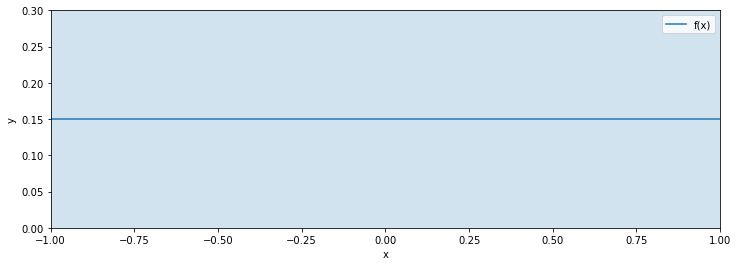

In [18]:
root = Node()
root.value = 0.15
y_test = pred1d([root], x_test)
plot_region1d(root, x_test, y_test)

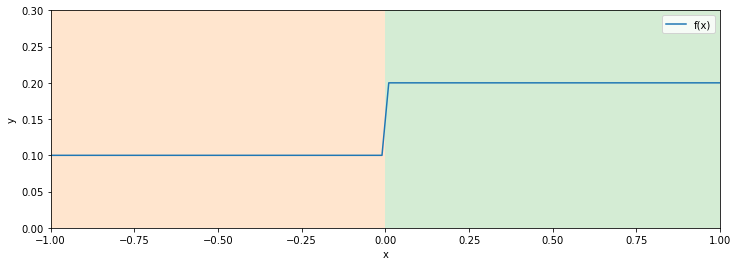

In [36]:
root = Node()
l = Node()
l.value = 0.1

r = Node()
r.value = 0.2 
root.value = 0
root.split = 0.0
root.left = l
root.right = r
y_test = pred1d([root], x_test)
plot_region1d(root, x_test, y_test)

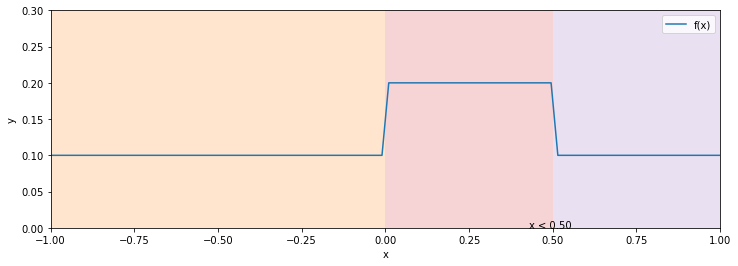

In [20]:
l = Node()
l.value = 0.1

r = Node()
r.split = 0.5
r.value = 0

rl = Node()
rl.value = 0.2

rr = Node()
rr.value = 0.1
r.left = rl
r.right =rr

root = Node()
root.split = 0.0
root.left = l
root.right = r

y_test = pred1d([root], x_test)

plot_region1d(root, x_test, y_test)

## Exercise 5

Given a set of training points $x_0 = -1, x_1=-0.5, x_2=0, x_3=0.5, x_4=1$. For the trees from Exercise 4, 
- determine the vector $w$
- evaluate the function $q$
- find the set $\mathcal{L}_n$ for all leaves $n$

## Solution 5

### Tree 1
- $L=1$ and $w$ is 0.15
- There is only one node, the root 0. Hence, $q(x) = 0$
- $\mathcal{L}_0 = {0,1,2,3,4}$

### Tree 2
- $L=2$, $w_0 = 0.1$, $w_1=0.2$
- $q(x_i) = 0$ for $i=0, 1$, and $q(x_i) = 1$ for $i=2,3,4$
- $\mathcal{L}_0 = {0,1}$
- $\mathcal{L}_1 = {2,3,4}$

### Tree 3
- $L=3$, $w_0 = 0.1$, $w_1=0.2$, $w_2=0.1$
- $q(x_i) = 0$ for $i=0, 1$, and $q(x_i) = 1$ for $i=2$, and $q(x_i) = 2$ for $i=3,4$
- $\mathcal{L}_0 = {0,1}$
- $\mathcal{L}_1 = {2}$
- $\mathcal{L}_2 = {3,4}$
